In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


environment_parameters_polder = '/home/ihor/work_space/grasp/home/aerosol_UA_simulation/environment_parameters/image_dat_polder_bimodal.txt'
environment_parameters_msip = '/home/ihor/work_space/grasp/home/aerosol_UA_simulation/environment_parameters/image_dat_MSIP_bimodal.txt'

In [4]:
polder_wl = np.array([0.4430, 0.4900, 0.5650, 0.6700, 0.8650, 1.0200])
msip_wl = np.array([0.4100000, 0.4430000, 0.4700000, 0.4900000, 0.5550000, 0.6700000, 0.8650000, 0.9100000])

n_wl = len(polder_wl)

In [3]:
par_lines = []
with open(environment_parameters_polder, 'r') as f:
    par_lines = f.readlines()

In [4]:
values = [line.split()[1:] for line in par_lines]
values = np.array(values)

In [5]:
params_size = {'size_distribution_lognormal_1': 2, # +
 'size_distribution_lognormal_2': 2, # +
 'real_part_of_refractive_index_spectral_dependent_1': n_wl, # +
 'real_part_of_refractive_index_spectral_dependent_2': n_wl, # +
 'imaginary_part_of_refractive_index_spectral_dependent_1': n_wl, # +
 'imaginary_part_of_refractive_index_spectral_dependent_2': n_wl,
 'sphere_fraction': 1, # +
 'vertical_profile_parameter_height': 1, # +
 'aerosol_concentration_1': 1, # +
 'aerosol_concentration_2': 1, # +
 'surface_land_brdf_ross_li_1': n_wl,
 'surface_land_brdf_ross_li_2': n_wl, # +
 'surface_land_brdf_ross_li_3': n_wl, # +
 'surface_land_polarized_maignan_breon': n_wl, # +
 'surface_water_cox_munk_iso_1': n_wl, 
 'surface_water_cox_munk_iso_2': n_wl, # +
 'surface_water_cox_munk_iso_3': n_wl # +
}

In [9]:
values_dict = {}
start = 0
for key in params_size:
    end = start + params_size[key]
    values_dict[key] = values[start : end]
    start = end

In [7]:
spectral_depended = ['imaginary_part_of_refractive_index_spectral_dependent_2',
                     'surface_land_brdf_ross_li_1',
                     'surface_water_cox_munk_iso_1']

In [18]:
from scipy import interpolate

msip_values_dict = {}
for key in values_dict:
    if params_size[key] == n_wl:
        value = []
        for t in values_dict[key].T:
            lr = interpolate.interp1d(polder_wl, t, bounds_error=False, fill_value="extrapolate")
            extra = lr(msip_wl)
            extra = np.where(extra < 0, 0, extra)
            value.append(extra)
        msip_values_dict[key] = np.array(value).T
    else:
        msip_values_dict[key] = values_dict[key]



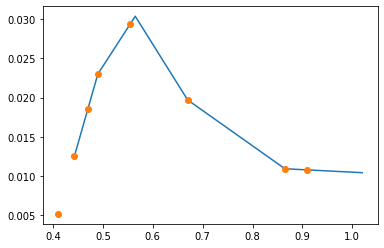

In [19]:
for t in values_dict['surface_water_cox_munk_iso_1'].T:
    lr = interpolate.interp1d(polder_wl, t, bounds_error=False, fill_value="extrapolate")
    
    
    
plt.plot(polder_wl, t.astype(float))    
plt.plot(msip_wl, lr(msip_wl), 'o')

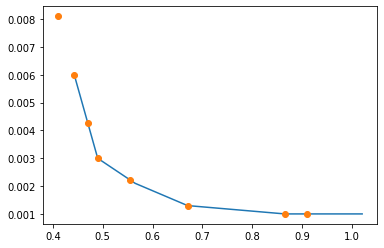

In [20]:
for t in values_dict['imaginary_part_of_refractive_index_spectral_dependent_2'].T:
    lr = interpolate.interp1d(polder_wl, t, bounds_error=False, fill_value="extrapolate")
    
    
    
plt.plot(polder_wl, t.astype(float))    
plt.plot(msip_wl, lr(msip_wl), 'o')

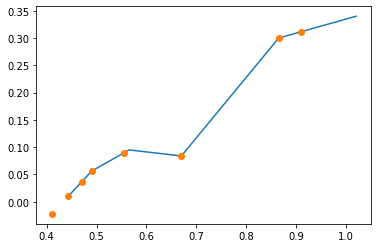

In [21]:
for t in values_dict['surface_land_brdf_ross_li_1'].T:
    lr = interpolate.interp1d(polder_wl, t, bounds_error=False, fill_value="extrapolate")
    
    
    
plt.plot(polder_wl, t.astype(float))    
plt.plot(msip_wl, lr(msip_wl), 'o')

In [22]:
general_arr = np.concatenate(list(msip_values_dict.values()))
indexes = np.array(range(general_arr.shape[0])) + 1

general_arr_with_index = np.concatenate([indexes.reshape(-1,1), general_arr], axis=1)

In [24]:
general_arr_with_index.shape

(96, 121)

In [23]:
with open(environment_parameters_msip, 'w') as f:
    for line in general_arr_with_index:
        f.write('\t'.join(line))
        f.write('\n')
